In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
data_df = pd.read_csv('https://raw.githubusercontent.com/charlesincharge/Caltech-CS155-2022/main/miniprojects/miniproject2/data/data.csv').astype(int)
movies_df = pd.read_csv('https://raw.githubusercontent.com/charlesincharge/Caltech-CS155-2022/main/miniprojects/miniproject2/data/movies.csv')
train_df = pd.read_csv('https://raw.githubusercontent.com/charlesincharge/Caltech-CS155-2022/main/miniprojects/miniproject2/data/train.csv')
test_df = pd.read_csv('https://raw.githubusercontent.com/charlesincharge/Caltech-CS155-2022/main/miniprojects/miniproject2/data/test.csv')

In [ ]:
display(data_df)

,User ID,Movie ID,Rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1
...,...,...,...
99995,880,476,3
99996,716,204,5
99997,276,1090,1
99998,13,225,2


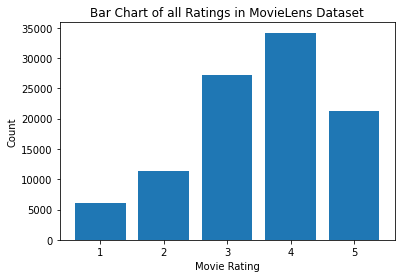

In [ ]:
# basic visualizations 1
ratings = data_df['Rating'].to_numpy().astype(int)
counts, bins = np.histogram(ratings,bins=[1,2,3,4,5,6])
rating_vals = [1,2,3,4,5]
plt.bar(rating_vals,counts)
plt.xlabel('Movie Rating')
plt.ylabel('Count')
plt.title('Bar Chart of all Ratings in MovieLens Dataset')
plt.savefig("Bar Chart of All Ratings")
plt.show()

In [ ]:
# basic visualizations 2
most_popular_df = data_df[['Movie ID','Rating']].groupby('Movie ID').agg('count').sort_values('Rating',ascending=False).head(10)
# display(most_popular_df)

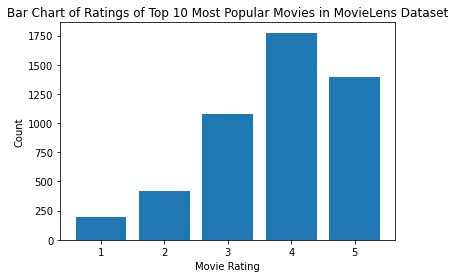

In [ ]:
d = data_df[['Movie ID', 'Rating']].to_numpy()
counts = np.zeros(5)
most_popular = [50, 258, 100, 181, 294, 286, 288, 1, 300, 121]
for id, rating in d:
    if id in most_popular:
        counts[rating - 1] += 1
plt.bar(rating_vals,counts)
plt.xlabel('Movie Rating')
plt.ylabel('Count')
plt.title('Bar Chart of Ratings of Top 10 Most Popular Movies in MovieLens Dataset')
plt.savefig("Bar Chart of Top 10 Most Popular Movies Ratings")
plt.show()

In [ ]:
# basic visualizations 3
best_df = data_df[['Movie ID','Rating']].groupby('Movie ID').mean().sort_values('Rating',ascending=False).head(15)
display(best_df)

,Rating
Movie ID,
814,5.000
1599,5.000
1201,5.000
1122,5.000
1653,5.000
1293,5.000
1500,5.000
1189,5.000
1536,5.000


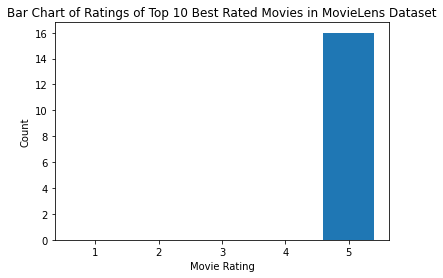

In [ ]:
d = data_df[['Movie ID', 'Rating']].to_numpy()
counts = np.zeros(5)
best = [814, 1599, 1201, 1122, 1653, 1293, 1500, 1189, 1536, 1467]
for id, rating in d:
    if id in best:
        counts[rating - 1] += 1
plt.bar(rating_vals,counts)
plt.xlabel('Movie Rating')
plt.ylabel('Count')
plt.title('Bar Chart of Ratings of Top 10 Best Rated Movies in MovieLens Dataset')
plt.savefig("Bar Chart of Top 10 Best Rated Movies Ratings")
plt.show()

In [ ]:
# basic visualizations 4
# display(movies_df.head(5))

In [ ]:
genres = ['Action', 'Horror', 'Comedy']
ids1 = []
ids2 = []
ids3 = []
for index, row in movies_df.iterrows():
    if row[genres[0]] == 1:
        ids1.append(row['Movie ID'])
    if row[genres[1]] == 1:
        ids2.append(row['Movie ID'])
    if row[genres[2]] == 1:
        ids3.append(row['Movie ID'])

In [ ]:
d = data_df[['Movie ID', 'Rating']].to_numpy()
counts1 = np.zeros(5)
counts2 = np.zeros(5)
counts3 = np.zeros(5)
for id, rating in d:
    if id in ids1:
        counts1[rating - 1] += 1
    if id in ids2:
        counts2[rating - 1] += 1
    if id in ids3:
        counts3[rating - 1] += 1

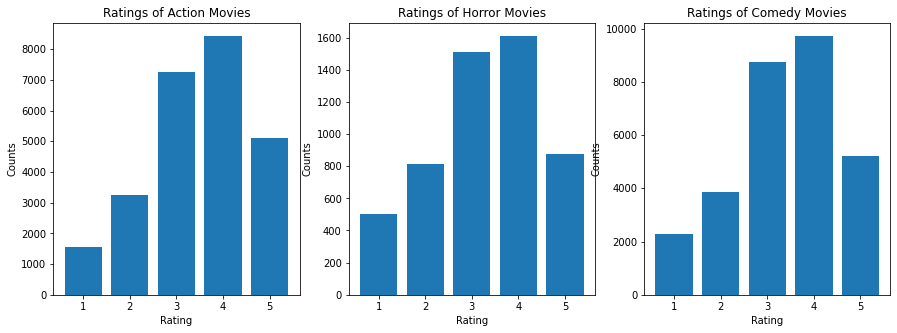

In [ ]:
fig, axs = plt.subplots(1,3,figsize=(15,5))

axs[0].bar(rating_vals,counts1)
axs[1].bar(rating_vals,counts2)
axs[2].bar(rating_vals,counts3)

axs[0].set_xlabel('Rating')
axs[1].set_xlabel('Rating')
axs[2].set_xlabel('Rating')

axs[0].set_ylabel('Counts')
axs[1].set_ylabel('Counts')
axs[2].set_ylabel('Counts')

axs[0].set_title(f'Ratings of {genres[0]} Movies')
axs[1].set_title(f'Ratings of {genres[1]} Movies')
axs[2].set_title(f'Ratings of {genres[2]} Movies')

fig.savefig("Bar Charts of Ratings by Genre")
fig.show()